In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook

In [74]:
import pylab as plt
import numpy
import sklearn.neighbors as skn
import multiprocessing as mpp


### Prime Spirals
- Just some fun graphs with radial representaitons of all numbers and prime numbers.
- Assume only natural numbers

In [35]:
def is_prime(x):
    # NOTE: it does not take too long to see that this function is not well suited to vectorization, or
    #  generally taking an array as an input.
    for k in numpy.arange(2, numpy.ceil(numpy.sqrt(x)).astype(int)):
        #
        
        #print('*** DEBUG: {}%{}={}'.format(x,k, x%k) )
        if numpy.mod(x,k)==0:
            return False
    return True
#
print('** isprime(12): ', is_prime(12))
print('** isprime(7): ', is_prime(7))

#print('** is_prime(X): ', is_prime(numpy.arange(20)))

** isprime(12):  False
** isprime(7):  True


In [65]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def polar2xy(r,theta):
    z = r * numpy.exp( 1j * theta)
    return numpy.array([numpy.real(z), numpy.imag(z)]).T

In [66]:
print(polar2xy(numpy.arange(1,20), numpy.arange(1,20)))

[[  0.54030231   0.84147098]
 [ -0.83229367   1.81859485]
 [ -2.96997749   0.42336002]
 [ -2.61457448  -3.02720998]
 [  1.41831093  -4.79462137]
 [  5.76102172  -1.67649299]
 [  5.27731578   4.59890619]
 [ -1.16400027   7.91486597]
 [ -8.20017236   3.70906637]
 [ -8.39071529  -5.44021111]
 [  0.04868268 -10.99989227]
 [ 10.1262475   -6.43887502]
 [ 11.79680816   5.46217148]
 [  1.91432105  13.86850298]
 [-11.39531869   9.7543176 ]
 [-15.32255169  -4.60645307]
 [ -4.67777675 -16.34375736]
 [ 11.88570075 -13.51777044]
 [ 18.78538775   2.84766698]]


In [ ]:
N_max=int(155000)
#
X = numpy.arange(N_max)
X_prime = numpy.array([x for x in X if is_prime(x) ])
#

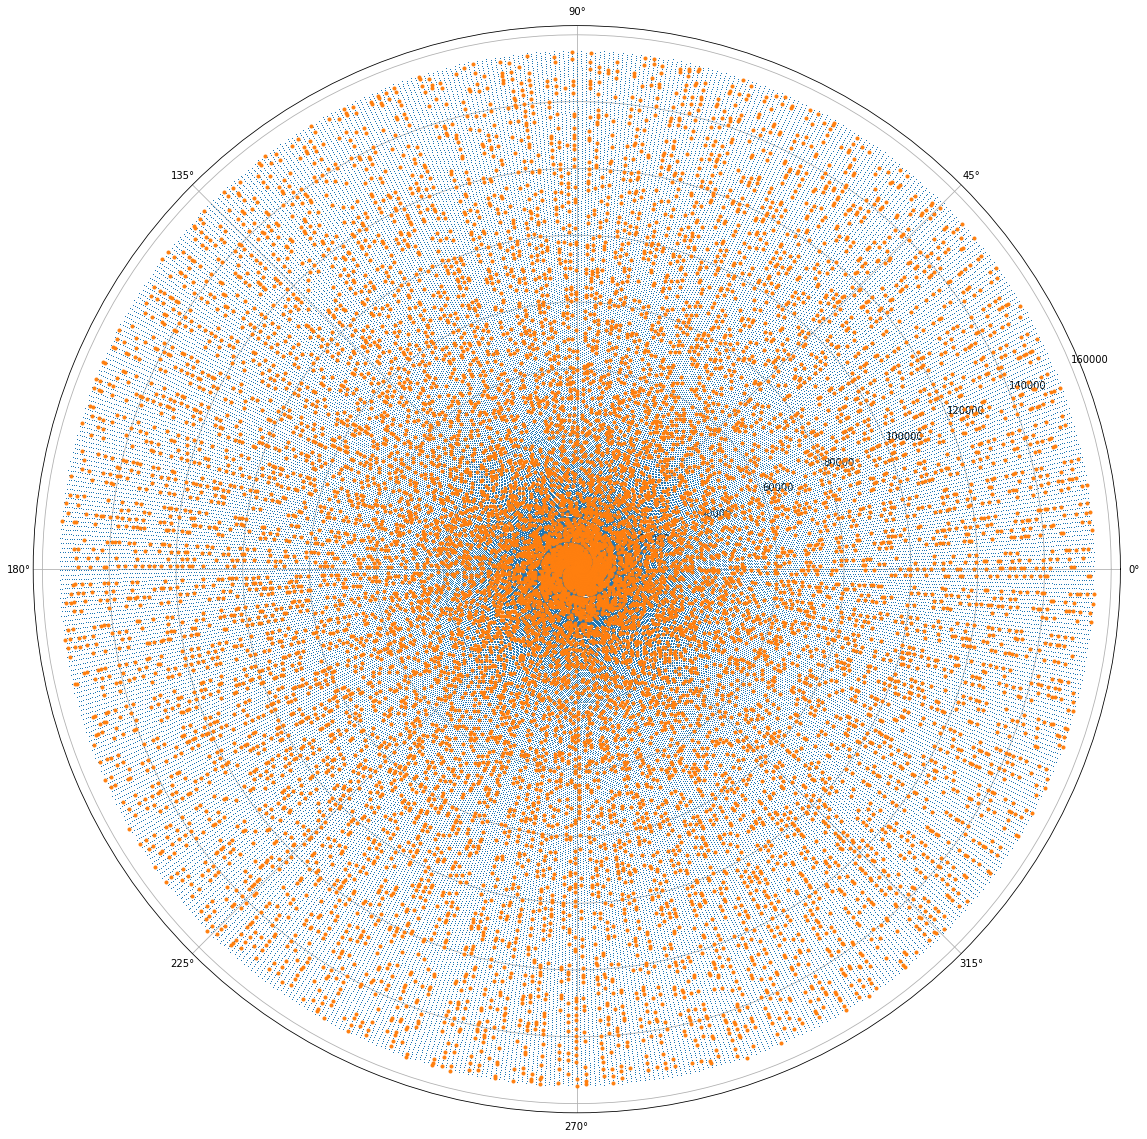

In [47]:
fg = plt.figure(figsize=(22,20))
ax1 = plt.gca(projection='polar')
#

ax1.plot(X,X, marker=',', ls='')
ax1.plot(X_prime, X_prime, marker='.', ls='')
#
ax1.grid(True)

In [78]:
# find and polt NN links:
n_cpu = mpp.cpu_count()

#nbrs = skn.NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
X_prime_xy = polar2xy(X_prime, X_prime)

nbrs = skn.NearestNeighbors(n_neighbors=2, n_jobs=n_cpu).fit(X_prime_xy)
distances, indices = nbrs.kneighbors(X_prime_xy)


**  0 1 [0. 0.] [1. 1.]
**  1 0 [1. 1.] [0. 0.]
**  2 1 [2. 2.] [1. 1.]
**  3 2 [3. 3.] [2. 2.]
**  4 3 [4. 4.] [3. 3.]
**  5 4 [5. 5.] [4. 4.]
**  6 1 [7. 7.] [1. 1.]
**  7 3 [9. 9.] [3. 3.]
**  8 5 [11. 11.] [5. 5.]
**  9 6 [13. 13.] [7. 7.]
**  10 8 [17. 17.] [11. 11.]


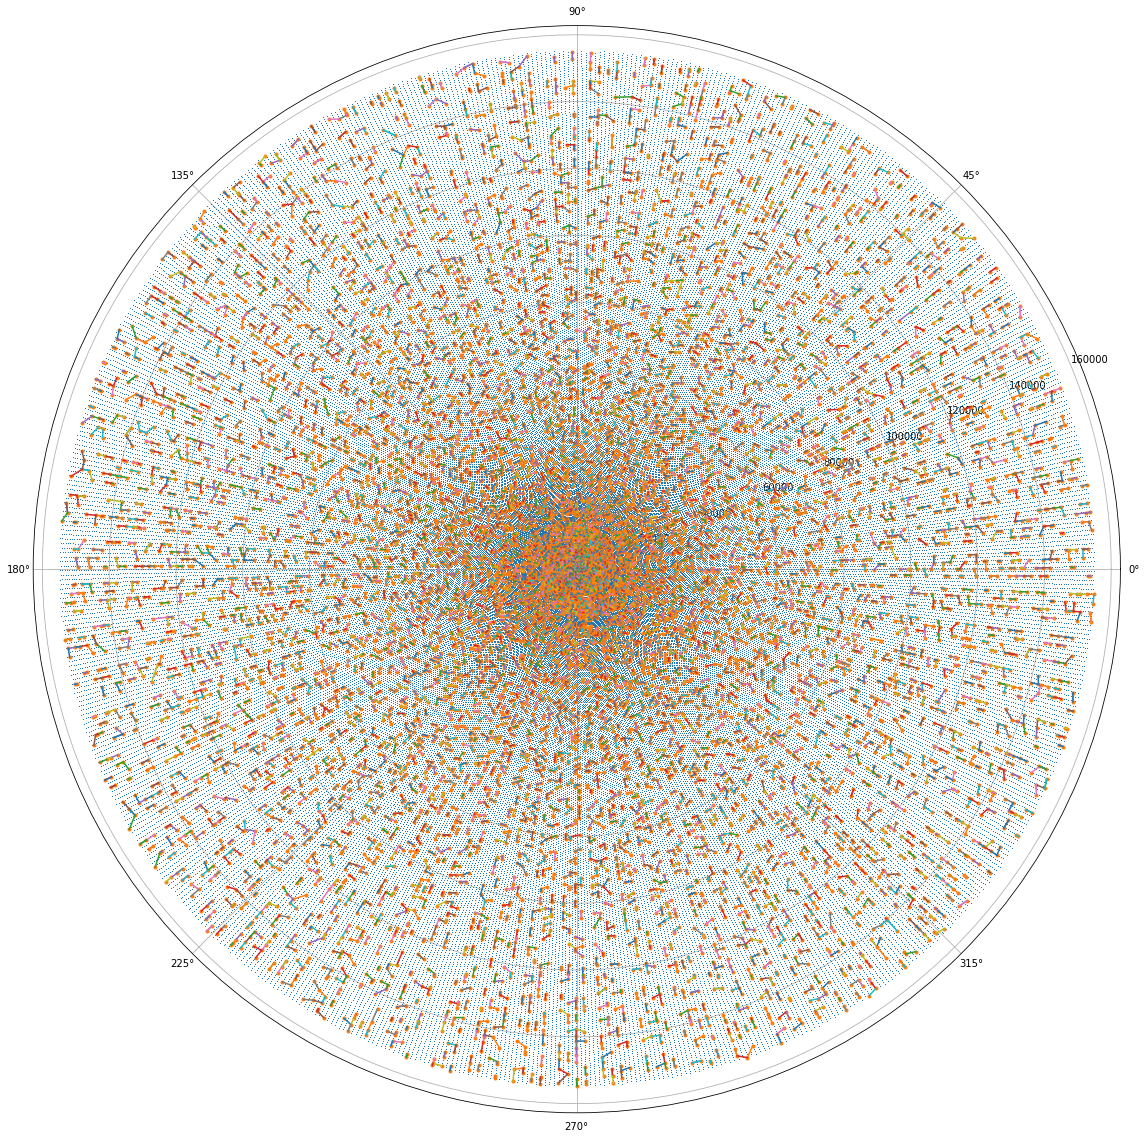

In [81]:
fg = plt.figure(figsize=(22,20))
ax1 = plt.gca(projection='polar')
#
k_min=0
k_max=X[-1]
ix = numpy.logical_and(X>=k_min, X<=k_max)
ix_prime = numpy.logical_and(X_prime>=k_min, X_prime<=k_max)
#

#ax1.plot(X[ix],X[ix], marker=',', ls='')
ln, = ax1.plot(X_prime[ix_prime], X_prime[ix_prime], marker='.', ls='')
clr = ln.get_color()
#
for j, (k1, k2) in enumerate(indices[ix_prime]):
    ax1.plot([X_prime[k1], X_prime[k2]], [X_prime[k1], X_prime[k2]], marker='', ls='-', color=clr)
    #
    #if j<11:
    #    print('** ', k1, k2, numpy.ones(2)*X_prime[k1], numpy.ones(2)*X_prime[k2] )
#
ax1.grid(True)
#ax1.set_rmax(2000)